In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
accident = pd.read_csv('Dataset//accident_data.csv')

In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [7]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [8]:
accident['Accident Date'] = accident['Accident Date'].fillna(accident['Accident Date'].mode()[0])

In [9]:
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])

In [10]:
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])

In [11]:
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())

In [12]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())

In [13]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                      0
Urban_or_Rural_Area            0
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [14]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [15]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [16]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [17]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [18]:
categorical_columns = [
    'Accident_Severity', 'Light_Conditions', 'District Area', 
    'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 
    'Weather_Conditions', 'Vehicle_Type'
]

for col in categorical_columns:
    accident[col] = accident[col].astype('category')

# Check the data types again
print(accident.dtypes)

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object


In [19]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>MAKE INSTANCES</h1>

<H1>UNIVARIATE</H1>

<h1>1 .WHAT IS THE TOTAL NUMBER OF ACCIDENTS IN EACH SEVERITY?</h1>

<H2>Insight 1. There is a total of 563,801 slight accidents</H2>
<h2>Insight 2. There is a total of 88,217 Serious accidents</h2>
<h2>Insight 3. There is a total of 8,661 Fatal accidents</h2>

In [20]:
accident_severity = (accident['Accident_Severity'].value_counts())
(accident_severity)

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

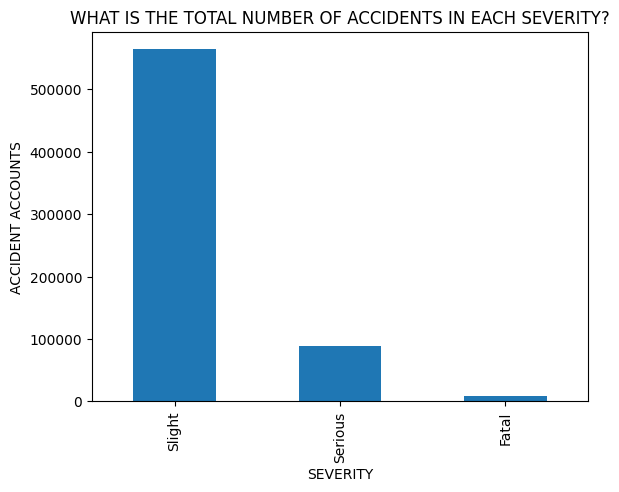

In [21]:
accident_severity.plot(kind='bar')
plt.title('WHAT IS THE TOTAL NUMBER OF ACCIDENTS IN EACH SEVERITY?')
plt.ylabel('ACCIDENT ACCOUNTS')
plt.xlabel('SEVERITY')
plt.show()

<H1>2.WHAT IS THE PERCENTAGE OF ACCIDENT SEVERITY IN 2019?</H1>

In [22]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'])
accident['Year'] = accident['Accident Date'].dt.year
accident_2019 = accident[accident['Year'] == 2019]
severity_percentage_2019 = accident_2019['Accident_Severity'].value_counts(normalize=True) * 100
severity_percentage_2019 = np.round(severity_percentage_2019, 2)
(severity_percentage_2019)

Accident_Severity
Slight     84.78
Serious    13.67
Fatal       1.55
Name: proportion, dtype: float64

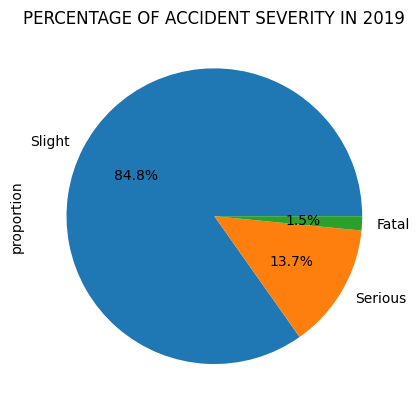

In [23]:
severity_percentage_2019.plot(kind='pie', autopct='%1.1f%%')
plt.title('PERCENTAGE OF ACCIDENT SEVERITY IN 2019')
plt.show()

<H2>Insight 4. There is 84.78% percent of slight accidents in 2019 followed by 13.67% of serious accidents and 1.55% of fatal accidents</H2>

<H1>3. WHAT IS THE PERCENTAGE OF accident SEVERITY IN 2020?</H1>

In [24]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'])
accident['Year'] = accident['Accident Date'].dt.year
accident_2020 = accident[accident['Year'] == 2020]
severity_percentage_2020 = accident_2020['Accident_Severity'].value_counts(normalize=True) * 100
severity_percentage_2020 = np.round(severity_percentage_2020, 2)
(severity_percentage_2020)

Accident_Severity
Slight     85.34
Serious    13.32
Fatal       1.34
Name: proportion, dtype: float64

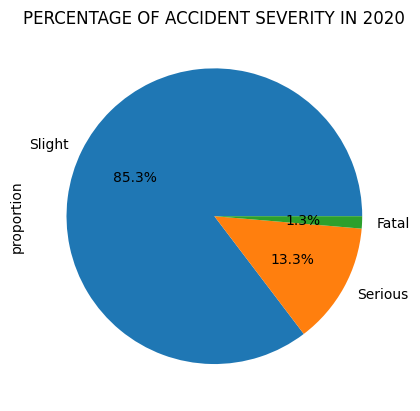

In [25]:
severity_percentage_2020.plot(kind='pie', autopct='%1.1f%%')
plt.title('PERCENTAGE OF ACCIDENT SEVERITY IN 2020')
plt.show()

<H2>Insight 5. There is 85.34% percent of slight accidents in 2020 followed by 13.32% of serious accidents and 1.34% of fatal accidents</H2>

<H1>4. WHAT IS THE PERCENTAGE OF ACCIDENT SEVERITY IN 2021?</H1>

In [26]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'])
accident['Year'] = accident['Accident Date'].dt.year
accident_2021 = accident[accident['Year'] == 2021]
severity_percentage_2021 = accident_2021['Accident_Severity'].value_counts(normalize=True) * 100
severity_percentage_2021 = np.round(severity_percentage_2021, 2)
(severity_percentage_2021)

Accident_Severity
Slight     85.37
Serious    13.39
Fatal       1.24
Name: proportion, dtype: float64

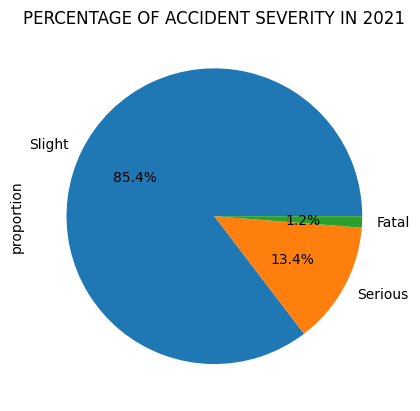

In [27]:
severity_percentage_2021.plot(kind='pie', autopct='%1.1f%%')
plt.title('PERCENTAGE OF ACCIDENT SEVERITY IN 2021')
plt.show()

<H2>Insight 6. There is 85.37% percent of slight accidents in 2021 followed by 13.39% of serious accidents and 1.24% of fatal accidents</H2>

<H1>6. WHAT IS THE PERCENTAGE OF SEVERITY IN 2022?</H1>

In [28]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'])
accident['Year'] = accident['Accident Date'].dt.year
accident_2022 = accident[accident['Year'] == 2022]
severity_percentage_2022 = accident_2022['Accident_Severity'].value_counts(normalize=True) * 100
severity_percentage_2022 = np.round(severity_percentage_2022, 2)
(severity_percentage_2022)

Accident_Severity
Slight     86.11
Serious    12.79
Fatal       1.10
Name: proportion, dtype: float64

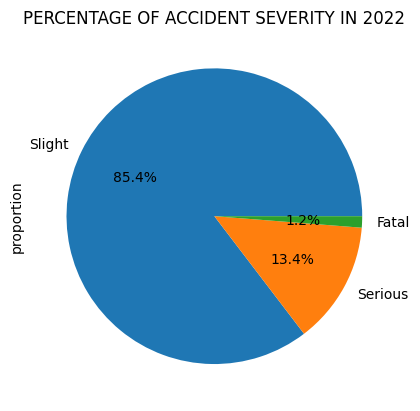

In [29]:
severity_percentage_2021.plot(kind='pie', autopct='%1.1f%%')
plt.title('PERCENTAGE OF ACCIDENT SEVERITY IN 2022')
plt.show()

<h1>5. DOES FATALITY OF ACCIDENT LESSEN EACH YEAR?</h1>

<H2>Insight No. 7 BASED ON THE DATA FROM YEARS 2019-2021 THE PERCENTAGE OF FATALITY DROP FROM 1.55% TO 1.24% SHOWING THAT FATALITY LESSEN EVERY YEAR</H2>

In [30]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'])
accident['Year'] = accident['Accident Date'].dt.year
fatal_accidents = accident[accident['Accident_Severity'] == 'Fatal']
fatal_percentage_by_year = fatal_accidents.groupby('Year').size() / accident.groupby('Year').size() * 100
fa = np.round(fatal_percentage_by_year, 2)
(fatal_percentage_by_year)

Year
2019.0    1.552868
2020.0    1.342588
2021.0    1.243728
2022.0    1.096734
dtype: float64

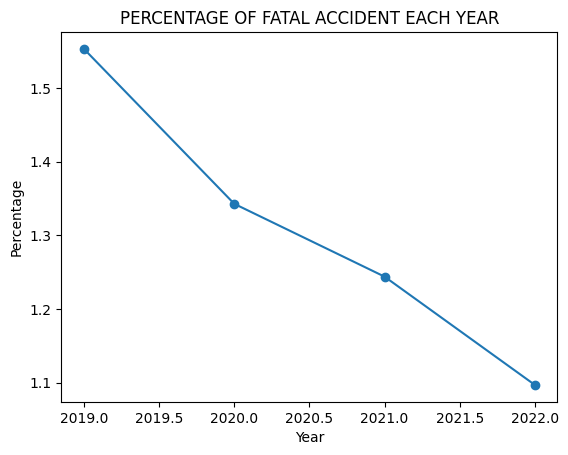

In [31]:
fatal_percentage_by_year.plot(kind='line', marker='o')
plt.title('PERCENTAGE OF FATAL ACCIDENT EACH YEAR')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show() 


<H2>Insight 8. There is 86.11% percent of slight accidents in 2022 followed by 12.79% of serious accidents and 1.10% of fatal accidents</H2>

<H1>BIVARIATE</H1>

<h1>7. WHAT VEHICLE HAS THE MOST FATAL SEVERITY ACCIDENT?</h1>

In [32]:
fatal_accidents_percentage = (accident[accident['Accident_Severity'] == 'Fatal']
                              .groupby('Vehicle_Type').size() 
                              / accident.groupby('Vehicle_Type').size()) * 100

fatal_accidents_percentage = np.round(fatal_accidents_percentage, 2)
(fatal_accidents_percentage)

Vehicle_Type
Agricultural vehicle                     1.08
Bus or coach (17 or more pass seats)     1.26
Car                                      1.32
Data missing or out of range             0.00
Goods 7.5 tonnes mgw and over            1.25
Goods over 3.5t. and under 7.5t          1.10
Minibus (8 - 16 passenger seats)         1.47
Motorcycle 125cc and under               1.24
Motorcycle 50cc and under                1.25
Motorcycle over 125cc and up to 500cc    1.37
Motorcycle over 500cc                    1.32
Other vehicle                            1.24
Pedal cycle                              3.05
Ridden horse                             0.00
Taxi/Private hire car                    1.17
Van / Goods 3.5 tonnes mgw or under      1.37
dtype: float64

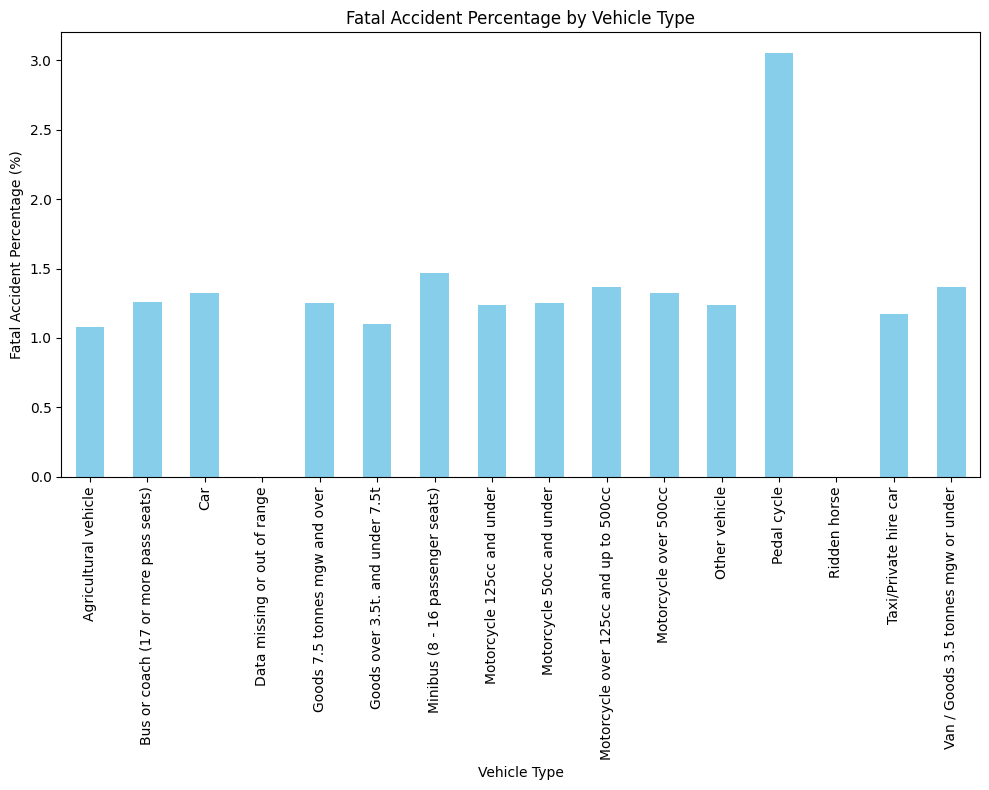

In [33]:
plt.figure(figsize=(10, 8))
fatal_accidents_percentage.plot(kind='bar', color='skyblue')
plt.title('Fatal Accident Percentage by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Fatal Accident Percentage (%)')
plt.tight_layout()
plt.show()

<H2>Insight 9. PEDAL CYCLE HAS MOST PERCENTAGE OF FATAL ACCIDENTS WITH 3.05%</H2>

<h1>8. WHAT VEHICLE HAS THE MOST SERIOUS SEVERITY ACCIDENT?</h1>

In [34]:
serious_accidents_percentage = accident[accident['Accident_Severity'] == 'Serious'] \
    .groupby('Vehicle_Type').size() / accident.groupby('Vehicle_Type').size() * 100
serious_accidents_percentage = np.round(serious_accidents_percentage, 2)
(serious_accidents_percentage)

Vehicle_Type
Agricultural vehicle                     14.48
Bus or coach (17 or more pass seats)     13.03
Car                                      13.35
Data missing or out of range              0.00
Goods 7.5 tonnes mgw and over            13.41
Goods over 3.5t. and under 7.5t          14.06
Minibus (8 - 16 passenger seats)         13.97
Motorcycle 125cc and under               13.30
Motorcycle 50cc and under                13.34
Motorcycle over 125cc and up to 500cc    13.24
Motorcycle over 500cc                    13.47
Other vehicle                            13.61
Pedal cycle                              19.80
Ridden horse                              0.00
Taxi/Private hire car                    13.32
Van / Goods 3.5 tonnes mgw or under      13.33
dtype: float64

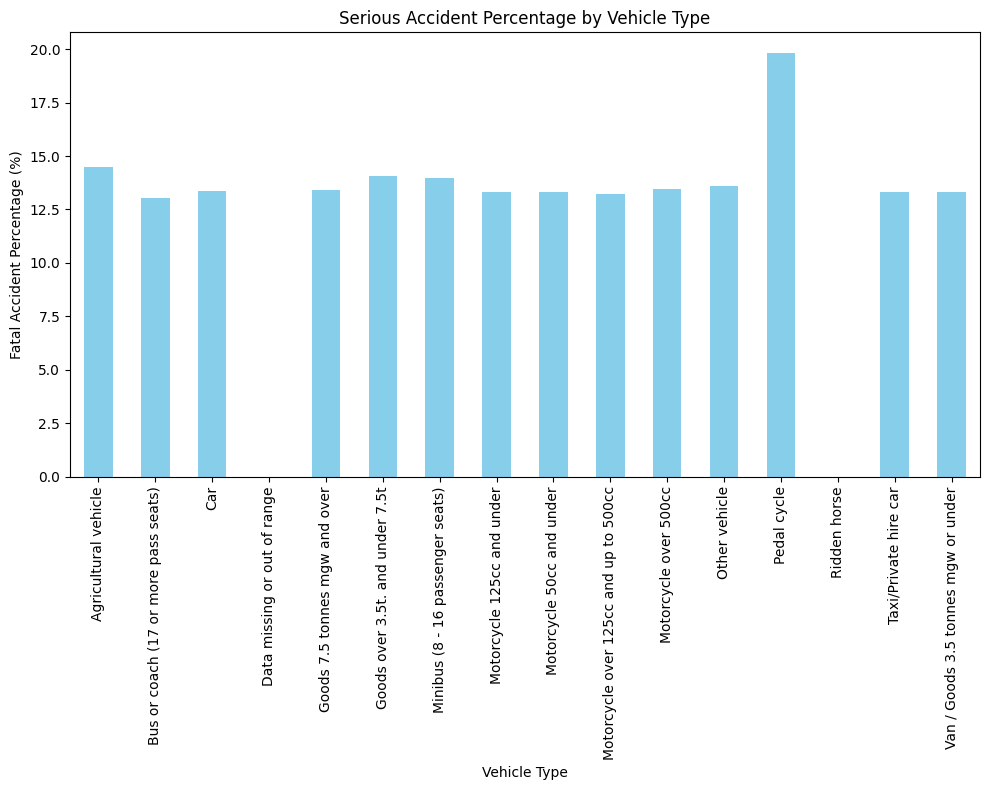

In [35]:
plt.figure(figsize=(10, 8))
serious_accidents_percentage.plot(kind='bar', color='skyblue')
plt.title('Serious Accident Percentage by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Fatal Accident Percentage (%)')
plt.tight_layout()
plt.show()

<H2>Insight 10. PEDAL CYCLE HAS MOST PERCENTAGE OF SERIOUS ACCIDENTS WITH 19.80%</H2>

<h1>9. WHAT VEHICLE HAS THE MOST SLIGHT SEVERITY ACCIDENT?</h1>

In [36]:
slight_accidents_percentage = accident[accident['Accident_Severity'] == 'Slight'] \
    .groupby('Vehicle_Type').size() / accident.groupby('Vehicle_Type').size() * 100
slight_accidents_percentage = np.round(slight_accidents_percentage, 2)
(slight_accidents_percentage)

Vehicle_Type
Agricultural vehicle                      84.44
Bus or coach (17 or more pass seats)      85.71
Car                                       85.33
Data missing or out of range             100.00
Goods 7.5 tonnes mgw and over             85.34
Goods over 3.5t. and under 7.5t           84.84
Minibus (8 - 16 passenger seats)          84.56
Motorcycle 125cc and under                85.46
Motorcycle 50cc and under                 85.41
Motorcycle over 125cc and up to 500cc     85.38
Motorcycle over 500cc                     85.20
Other vehicle                             85.15
Pedal cycle                               77.16
Ridden horse                             100.00
Taxi/Private hire car                     85.51
Van / Goods 3.5 tonnes mgw or under       85.30
dtype: float64

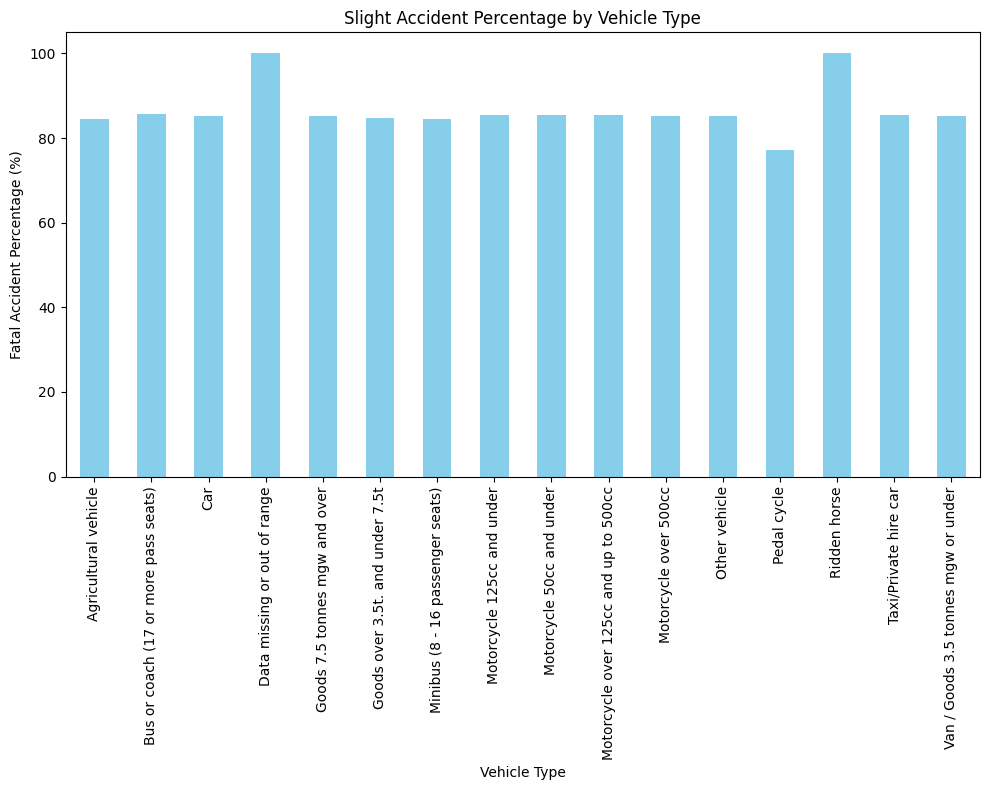

In [37]:
plt.figure(figsize=(10, 8))
slight_accidents_percentage.plot(kind='bar', color='skyblue')
plt.title('Slight Accident Percentage by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Fatal Accident Percentage (%)')
plt.tight_layout()
plt.show()

<H2>Insight 11. Bus or coach (17 or more pass seats) HAS MOST PERCENTAGE OF SLIGHT ACCIDENTS WITH 85.71% FOLLOWED BY TAXI/PRIVATE HIRE CAR WITH 85.51%"</H2>

<H1>10.DOES ROAD TYPE AFFECTS THE SEVERITY OF ACCIDENTS</H1>

In [38]:
severity_by_road_type = accident.groupby(['Road_Type', 'Accident_Severity']).size()
severity_by_road_type_percentage = severity_by_road_type / severity_by_road_type.groupby('Road_Type').transform('sum') * 100
severity_by_road_type_percentage = np.round(severity_by_road_type_percentage, 2)
(severity_by_road_type_percentage)

Road_Type           Accident_Severity
Dual carriageway    Fatal                 1.83
                    Serious              11.81
                    Slight               86.36
One way street      Fatal                 0.70
                    Serious              12.21
                    Slight               87.09
Roundabout          Fatal                 0.32
                    Serious               8.33
                    Slight               91.35
Single carriageway  Fatal                 1.32
                    Serious              14.20
                    Slight               84.48
Slip road           Fatal                 0.70
                    Serious               8.68
                    Slight               90.63
dtype: float64

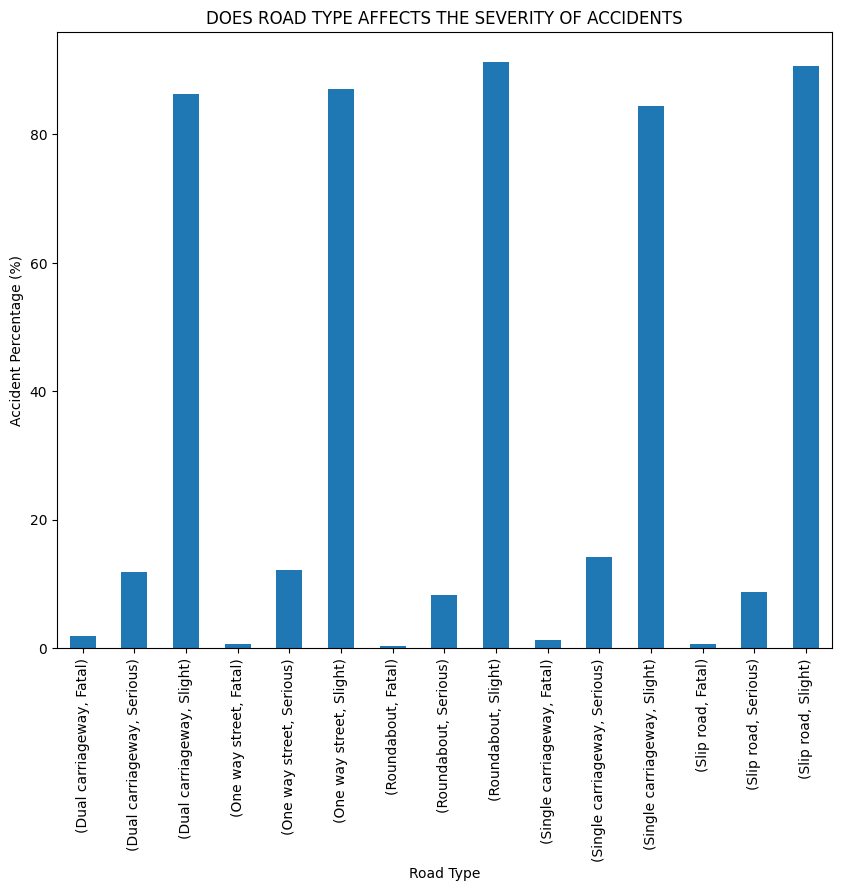

In [39]:
plt.figure(figsize=(10, 8))
severity_by_road_type_percentage.plot(kind='bar', stacked=True)
plt.title('DOES ROAD TYPE AFFECTS THE SEVERITY OF ACCIDENTS')
plt.xlabel('Road Type')
plt.ylabel('Accident Percentage (%)')
plt.show()

<h2>Insight 12. Single carriage and Dual Carriage way has the most Fatal Accident Severity </h2>

<h1>11.WHAT ROAD TYPE HAS THE SLIGHTEST ACCIDENT SEVERITY?</h1>

<H2>Insight 13. ROUNDABOUT HAS MOST PERCENTAGE OF SLIGHTEST ACCIDENT SEVERITY WITH 91.35%</H2>

<h1>12.WHAT ROAD TYPE HAS THE MOST SERIOUS ACCIDENT SEVERITY?</h1>

<H2>Insight 14. SINGLE CARRIEGEWAY HAS MOST PERCENTAGE OF SERIOUS ACCIDENT SEVERITY WITH 14.20%</H2>

<h1>13. WHAT ROAD TYPE HAS THE MOST FATAL ACCIDENT SEVERITY?</h1>

<H2>Insight 15. DUAL CARRIAGEWAY HAS MOST PERCENTAGE OF FATAL ACCIDENT SEVERITY WITH 1.83%</H2

<H1>14. DOES LIGHT CONDITION AFFECTS ACCIDENT SEVERITY</H1>

In [40]:
light_severity_counts = accident.groupby(['Light_Conditions', 'Accident_Severity']).size().reset_index(name='Count')
(light_severity_counts)

,Light_Conditions,Accident_Severity,Count
0,Darkness - lighting unknown,Fatal,68
1,Darkness - lighting unknown,Serious,794
2,Darkness - lighting unknown,Slight,5622
3,Darkness - lights lit,Fatal,1860
4,Darkness - lights lit,Serious,19130
5,Darkness - lights lit,Slight,108345
6,Darkness - lights unlit,Fatal,45
7,Darkness - lights unlit,Serious,360
8,Darkness - lights unlit,Slight,2138
9,Darkness - no lighting,Fatal,1612


<H2>Insight 16. From the data that we have gathered we've seen that the light conditions has impact on the severity of accidents</H2

In [41]:
light_severity_counts = accident.groupby(['Light_Conditions', 'Accident_Severity']).size().reset_index(name='Count')
total_by_light = light_severity_counts.groupby('Light_Conditions')['Count'].transform('sum')
light_severity_counts['Percentage'] = (light_severity_counts['Count'] / total_by_light) * 100
light_severity_counts = np.round(light_severity_counts, 2)
(light_severity_counts)

,Light_Conditions,Accident_Severity,Count,Percentage
0,Darkness - lighting unknown,Fatal,68,1.05
1,Darkness - lighting unknown,Serious,794,12.25
2,Darkness - lighting unknown,Slight,5622,86.71
3,Darkness - lights lit,Fatal,1860,1.44
4,Darkness - lights lit,Serious,19130,14.79
5,Darkness - lights lit,Slight,108345,83.77
6,Darkness - lights unlit,Fatal,45,1.77
7,Darkness - lights unlit,Serious,360,14.16
8,Darkness - lights unlit,Slight,2138,84.07
9,Darkness - no lighting,Fatal,1612,4.31


<H2>Insight 17. Contrary to the saying that in Darkness there are more severe accidents we saw from the data that in Daylight there are more sever accidents with the total of 5076</H2

<H2>Insight 18. If we based on the percentage of the one with highest fatality we will see that Darkness - no lighting has the highest percentage of 4.31% </H2

<H2>Insight 19. If we based on the percentage of the one with the most serious severity we will see that Darkness - no lighting has the highest percentage of 19.16%</H2

<H2>Insight 20. If we based on the percentage of the one with slightest accident severity we will see that Darkness - lighting unknown has the highest percentage of 86.71% </H2

In [42]:
light_severity_counts = accident[['Light_Conditions', 'Accident_Severity']].value_counts().reset_index(name='Count')
light_severity_counts['Percentage'] = light_severity_counts['Count'] / light_severity_counts.groupby('Light_Conditions')['Count'].transform('sum') * 100
light_severity_counts = np.round(light_severity_counts, 2)
Darklightunk_severity = light_severity_counts[light_severity_counts['Light_Conditions'] == 'Darkness - lighting unknown']
(Darklightunk_severity)

,Light_Conditions,Accident_Severity,Count,Percentage
6,Darkness - lighting unknown,Slight,5622,86.71
11,Darkness - lighting unknown,Serious,794,12.25
13,Darkness - lighting unknown,Fatal,68,1.05


In [43]:
light_severity_counts = accident[['Light_Conditions', 'Accident_Severity']].value_counts().reset_index(name='Count')
light_severity_counts['Percentage'] = light_severity_counts['Count'] / light_severity_counts.groupby('Light_Conditions')['Count'].transform('sum') * 100
light_severity_counts = np.round(light_severity_counts, 2)
Darklightlit_severity = light_severity_counts[light_severity_counts['Light_Conditions'] == 'Darkness - lights lit']
(Darklightlit_severity)

,Light_Conditions,Accident_Severity,Count,Percentage
1,Darkness - lights lit,Slight,108345,83.77
4,Darkness - lights lit,Serious,19130,14.79
9,Darkness - lights lit,Fatal,1860,1.44


In [44]:
light_severity_counts = accident[['Light_Conditions', 'Accident_Severity']].value_counts().reset_index(name='Count')
light_severity_counts['Percentage'] = light_severity_counts['Count'] / light_severity_counts.groupby('Light_Conditions')['Count'].transform('sum') * 100
light_severity_counts = np.round(light_severity_counts, 2)
Darklightunlit_severity = light_severity_counts[light_severity_counts['Light_Conditions'] == 'Darkness - lights unlit']
(Darklightunlit_severity)

,Light_Conditions,Accident_Severity,Count,Percentage
8,Darkness - lights unlit,Slight,2138,84.07
12,Darkness - lights unlit,Serious,360,14.16
14,Darkness - lights unlit,Fatal,45,1.77


In [45]:
light_severity_counts = accident[['Light_Conditions', 'Accident_Severity']].value_counts().reset_index(name='Count')
light_severity_counts['Percentage'] = light_severity_counts['Count'] / light_severity_counts.groupby('Light_Conditions')['Count'].transform('sum') * 100
light_severity_counts = np.round(light_severity_counts, 2)
Darknolight_severity = light_severity_counts[light_severity_counts['Light_Conditions'] == 'Darkness - no lighting']
(Darknolight_severity)

,Light_Conditions,Accident_Severity,Count,Percentage
3,Darkness - no lighting,Slight,28651,76.53
5,Darkness - no lighting,Serious,7174,19.16
10,Darkness - no lighting,Fatal,1612,4.31


In [46]:
light_severity_counts = accident[['Light_Conditions', 'Accident_Severity']].value_counts().reset_index(name='Count')
light_severity_counts['Percentage'] = light_severity_counts['Count'] / light_severity_counts.groupby('Light_Conditions')['Count'].transform('sum') * 100
light_severity_counts = np.round(light_severity_counts, 2)
Daylight_severity = light_severity_counts[light_severity_counts['Light_Conditions'] == 'Daylight']
(Daylight_severity)

,Light_Conditions,Accident_Severity,Count,Percentage
0,Daylight,Slight,419045,86.42
2,Daylight,Serious,60759,12.53
7,Daylight,Fatal,5076,1.05


<H1>MULTI-VARIATE</H1>

<h1>14. How does the type of road and the type of vehicle influence the severity of accidents?</h1>



In [47]:
severity_by_road_vehicle = accident.groupby(['Road_Type', 'Vehicle_Type', 'Accident_Severity']).size().reset_index(name='Accident_Count')
(severity_by_road_vehicle)

,Road_Type,Vehicle_Type,Accident_Severity,Accident_Count
0,Dual carriageway,Agricultural vehicle,Fatal,6
1,Dual carriageway,Agricultural vehicle,Serious,37
2,Dual carriageway,Agricultural vehicle,Slight,250
3,Dual carriageway,Bus or coach (17 or more pass seats),Fatal,63
4,Dual carriageway,Bus or coach (17 or more pass seats),Serious,489
...,...,...,...,...
235,Slip road,Taxi/Private hire car,Serious,21
236,Slip road,Taxi/Private hire car,Slight,103
237,Slip road,Van / Goods 3.5 tonnes mgw or under,Fatal,6
238,Slip road,Van / Goods 3.5 tonnes mgw or under,Serious,27


In [48]:
fatal_accidents = severity_by_road_vehicle[severity_by_road_vehicle['Accident_Severity'] == 'Fatal']
total_accidents = severity_by_road_vehicle.groupby(['Road_Type', 'Vehicle_Type'])['Accident_Count'].sum().reset_index(name='Total_Accidents')
fatal_percentage = pd.merge(fatal_accidents, total_accidents, on=['Road_Type', 'Vehicle_Type'])
fatal_percentage['Fatal_Percentage'] = (fatal_percentage['Accident_Count'] / fatal_percentage['Total_Accidents']) * 100
fatal_percentage['Fatal_Percentage'] = fatal_percentage['Fatal_Percentage'].round(2)
(fatal_percentage)

,Road_Type,Vehicle_Type,Accident_Severity,Accident_Count,Total_Accidents,Fatal_Percentage
0,Dual carriageway,Agricultural vehicle,Fatal,6,293,2.05
1,Dual carriageway,Bus or coach (17 or more pass seats),Fatal,63,4043,1.56
2,Dual carriageway,Car,Fatal,1364,74820,1.82
3,Dual carriageway,Data missing or out of range,Fatal,0,1,0.00
4,Dual carriageway,Goods 7.5 tonnes mgw and over,Fatal,49,2631,1.86
...,...,...,...,...,...,...
75,Slip road,Other vehicle,Fatal,1,64,1.56
76,Slip road,Pedal cycle,Fatal,0,2,0.00
77,Slip road,Ridden horse,Fatal,0,0,NaN
78,Slip road,Taxi/Private hire car,Fatal,0,124,0.00


<h1>LINE PLOT</h1> 

<H1>EXAMPLE</H1>

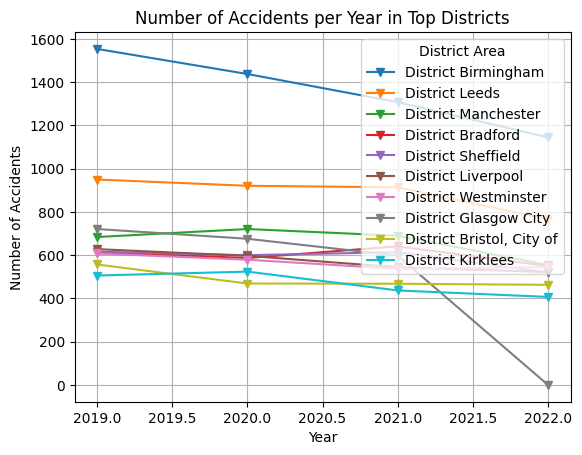

In [49]:
year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name='Accident_Count')
easy_df = year_area.pivot(index='Year', columns='District Area', values='Accident_Count')
total_accidents_per_district = year_area.groupby('District Area')['Accident_Count'].sum()
top_districts = total_accidents_per_district.nlargest(10).index

for district in top_districts:
    plt.plot(easy_df.index, easy_df[district], label=f'District {district}', marker='v')

plt.title('Number of Accidents per Year in Top Districts')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='District Area')
plt.grid(True)
plt.show()

<h1>VISUALIZING CORRELATION</h1>

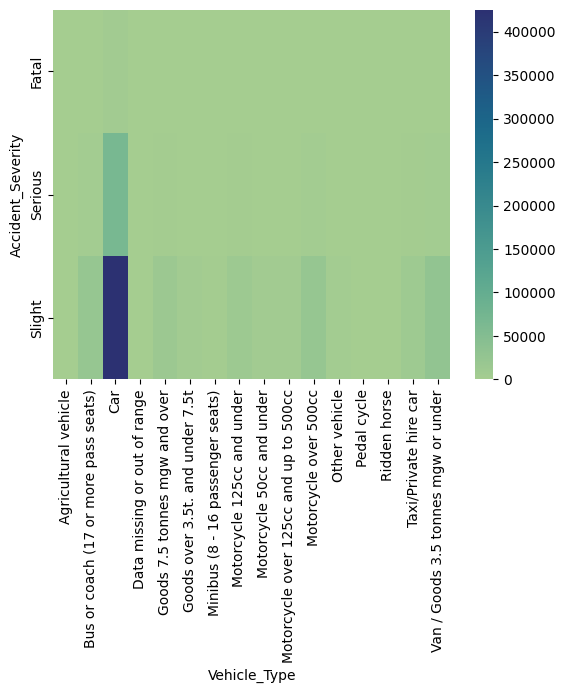

In [50]:
cas_veh = accident.groupby(['Accident_Severity', 'Vehicle_Type']).size().unstack()
sns.heatmap(cas_veh, cmap='crest')
plt.show()